Merge All json files

In [1]:
import pandas as pd
from pathlib import Path
import os

directory = Path(os.getcwd())   
directory = directory.parent.parent.joinpath("data") 
directory

WindowsPath('c:/Users/samue/OneDrive/Desktop/JPM Fintech/data')

In [5]:
# find all json files from all sub-directories
files = directory.glob("**/*.json")
# open a dataframe to store all data
df = pd.DataFrame()
for file in files:
    df = df.append(pd.read_json(file), ignore_index=True) #append each json to df

df

,id,text,time,sentiment
0,417739155,$GOEV it’s so easy to see insiders buying befo...,1639643526,
1,417739053,$QQQ $AAPL $SPY $NDX Santa’s rally has an addr...,1639643425,
2,417738922,$AAPL Futures Ripping Means \nAAPL up 2% to 4%...,1639643308,
3,417738486,$AAPL pullback today,1639642896,Bearish
4,417738230,$AAPL look! The teddy bear picnic is starting!...,1639642665,Bullish
...,...,...,...,...
47815,419624841,$PYPL $V holding up well to the long side. $MC...,1640145912,
47816,419623909,$V $MSFT $MMM $HPQ suggested for $XMI US ARCA ...,1640145541,
47817,419618889,$SQ and $V similar charts. We will see $180,1640143905,
47818,419605709,$V damn putting in some work last couple of we...,1640139998,Bullish


store dataframe to pickle file

In [6]:
# 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\data\\stocktwits_sample.pkl'
df.to_pickle(str(directory.joinpath("stocktwits_raw_sample.pkl")))

Read pickle file

In [2]:
df = pd.read_pickle(str(directory.joinpath("stocktwits_raw_full.pkl")))
df

,id,text,time,sentiment
0,411887895,$AAPL Funny how the whales hide their bearish ...,1638289838,Bearish
1,411887437,$AAPL I&#39;m buying 100 put contracts for the...,1638289746,Bearish
2,411887365,"$AAPL yeah, yeah. We all own it…that’s the point.",1638289733,
3,411887166,$AAPL can you imagine if $SPY and $QQQ were gr...,1638289691,Bullish
4,411886866,$AAPL,1638289630,
...,...,...,...,...
273832,420632925,"$V History shows that towards year end, market...",1640502969,
273833,420630353,@Bfox111 Maybe a good buyout opportunity for a...,1640500967,Bullish
273834,420612505,$V you think with these airline cancellation n...,1640468616,
273835,420610594,SweepCast observed: $V with Unusual Options Ac...,1640466249,


Change time format

In [3]:
import datetime
df['time'] = [datetime.datetime.fromtimestamp(date) for date in df['time']]
df

,id,text,time,sentiment
0,411887895,$AAPL Funny how the whales hide their bearish ...,2021-12-01 00:30:38,Bearish
1,411887437,$AAPL I&#39;m buying 100 put contracts for the...,2021-12-01 00:29:06,Bearish
2,411887365,"$AAPL yeah, yeah. We all own it…that’s the point.",2021-12-01 00:28:53,
3,411887166,$AAPL can you imagine if $SPY and $QQQ were gr...,2021-12-01 00:28:11,Bullish
4,411886866,$AAPL,2021-12-01 00:27:10,
...,...,...,...,...
273832,420632925,"$V History shows that towards year end, market...",2021-12-26 15:16:09,
273833,420630353,@Bfox111 Maybe a good buyout opportunity for a...,2021-12-26 14:42:47,Bullish
273834,420612505,$V you think with these airline cancellation n...,2021-12-26 05:43:36,
273835,420610594,SweepCast observed: $V with Unusual Options Ac...,2021-12-26 05:04:09,


Time distribution

<AxesSubplot:>

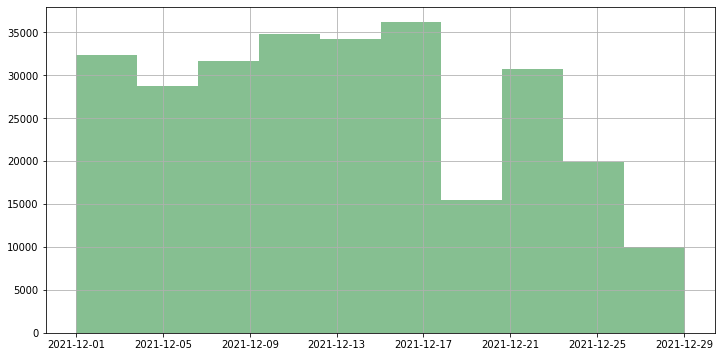

In [4]:
df.time.hist(figsize=(12,6),color='#86bf91')

Extract stock symbols

In [14]:
import re
# given a text, find the related symbols and remove it 
# return: a string of text and a list of symbols
def find_and_remove_syb(text):
    symbols = re.findall(r"\B[$][a-zA-Z]*", text)
    symbols = [i for i in symbols if i != "$"]
    for symbol in symbols:
        text = text.replace(symbol, "")
    return text, symbols

In [15]:
# create a new dataframe
df_stocks = pd.DataFrame(columns=['text', 'time', 'symbols'])
for ind in range(len(df)):
    processed = find_and_remove_syb(df.iloc[ind].text)
    # if one or more stocks appear in the text, duplicate the text
    for stock in processed[1]:
        # append to the dataframe
        df_stocks = df_stocks.append({"text": processed[0], "symbols": stock, "time": df.iloc[ind].time}, ignore_index=True)
df_stocks

,text,time,symbols
0,$GOEV it’s so easy to see insiders buying befo...,1639643526,$GOEV
1,$GOEV it’s so easy to see insiders buying befo...,1639643526,$AAPL
2,$QQQ $AAPL $SPY $NDX Santa’s rally has an addr...,1639643425,$QQQ
3,$QQQ $AAPL $SPY $NDX Santa’s rally has an addr...,1639643425,$AAPL
4,$QQQ $AAPL $SPY $NDX Santa’s rally has an addr...,1639643425,$SPY
...,...,...,...
76591,$V $MSFT $MMM $HPQ suggested for $XMI US ARCA ...,1640145541,$XMI
76592,$SQ and $V similar charts. We will see $180,1640143905,$SQ
76593,$SQ and $V similar charts. We will see $180,1640143905,$V
76594,$V damn putting in some work last couple of we...,1640139998,$V


In [16]:
# store to pickle file
df_stocks.to_pickle(directory.joinpath("stocktwits_processed_with_symbol_sample.pkl"))

Remove websites

In [17]:
df = pd.read_pickle(directory.joinpath("stocktwits_processed_with_symbol_sample.pkl"))
df.iloc[0]['text']

'$GOEV it’s so easy to see insiders buying before the BIG ANNOUNCEMENT $AAPL'

In [5]:
def remove_website(text):
    for word in text.split():
        if 'http' in word:
            text = text.replace(word, '')
    return text

df['text'] = [remove_website(i) for i in list(df['text'])]

decode html entities

In [9]:
import html
df['text'] = [html.unescape(i) for i in list(df['text'])]
df

,id,text,time,sentiment
0,411887895,$AAPL Funny how the whales hide their bearish ...,2021-12-01 00:30:38,Bearish
1,411887437,$AAPL I'm buying 100 put contracts for the $16...,2021-12-01 00:29:06,Bearish
2,411887365,"$AAPL yeah, yeah. We all own it…that’s the point.",2021-12-01 00:28:53,
3,411887166,$AAPL can you imagine if $SPY and $QQQ were gr...,2021-12-01 00:28:11,Bullish
4,411886866,$AAPL,2021-12-01 00:27:10,
...,...,...,...,...
273832,420632925,"$V History shows that towards year end, market...",2021-12-26 15:16:09,
273833,420630353,@Bfox111 Maybe a good buyout opportunity for a...,2021-12-26 14:42:47,Bullish
273834,420612505,$V you think with these airline cancellation n...,2021-12-26 05:43:36,
273835,420610594,SweepCast observed: $V with Unusual Options Ac...,2021-12-26 05:04:09,


change all symbols to large capital

In [8]:
df['symbols'] = [i.upper() for i in df['symbols']]
df

KeyError: 'symbols'

tokenize words + remove stopwords

In [128]:
import string
punc = string.punctuation
# modify punctuation
def change_punc(words):
    return words.replace("’","'")

from nltk.corpus import stopwords
def tokens(words):
    text = words.lower().split()
    return " ".join(text)

def remove_punc(words):
    return words.translate(str.maketrans('', '', punc))

stop = stopwords.words('english')
stop.extend(['s'])

def remove_stopwords(words):
    return ' '.join([i.lower() for i in words.split() if i.lower() not in stop])


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(words):
    return ' '.join([lemmatizer.lemmatize(i) for i in words.split()])

In [129]:
df['text'] = df['text'].apply(change_punc)
df['tokens'] = df['text'].apply(remove_punc)
df['tokens'] = df['tokens'].apply(remove_stopwords)
df['tokens'] = df['tokens'].apply(tokens)

df.head()

,text,time,symbols,tokens
0,it's so easy to see insiders buying before th...,1639643526,$GOEV,easy see insiders buying big announcement
1,it's so easy to see insiders buying before th...,1639643526,$AAPL,easy see insiders buying big announcement
2,Santa's rally has an address to visit : “1...,1639643425,$QQQ,santas rally address visit “17000 ndx breakout...
3,Santa's rally has an address to visit : “1...,1639643425,$AAPL,santas rally address visit “17000 ndx breakout...
4,Santa's rally has an address to visit : “1...,1639643425,$SPY,santas rally address visit “17000 ndx breakout...


In [21]:
# store to pickle file
df.to_pickle(directory.joinpath("stocktwits_processed_with_symbol_sample.pkl"))

In [22]:
df

,text,time,symbols
0,$GOEV it’s so easy to see insiders buying befo...,1639643526,$GOEV
1,$GOEV it’s so easy to see insiders buying befo...,1639643526,$AAPL
2,$QQQ $AAPL $SPY $NDX Santa’s rally has an addr...,1639643425,$QQQ
3,$QQQ $AAPL $SPY $NDX Santa’s rally has an addr...,1639643425,$AAPL
4,$QQQ $AAPL $SPY $NDX Santa’s rally has an addr...,1639643425,$SPY
...,...,...,...
76591,$V $MSFT $MMM $HPQ suggested for $XMI US ARCA ...,1640145541,$XMI
76592,$SQ and $V similar charts. We will see $180,1640143905,$SQ
76593,$SQ and $V similar charts. We will see $180,1640143905,$V
76594,$V damn putting in some work last couple of we...,1640139998,$V


In [2]:
import pandas as pd
from pathlib import Path
import os

directory = Path(os.getcwd())   # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\HKUST-x-J.P.-Morgan-Fintech-Mentorship-Program\\model_testing\\supervised'
directory = directory.parent.parent.joinpath("data")  # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\data'
df = pd.read_pickle(directory.joinpath("stocktwits_processed_cleaned_full.pkl"))

In [10]:
df.iloc[:,:-1]

,id,text,time,sentiment,symbols
0,411896118,I’m comfortable at $127.50. I’ll check back in...,1638291431,Bullish,$BABA
1,411895020,how low does this POS go tomorrow is the milli...,1638291222,,$BABA
2,411894156,@Nobrainer6868 started my first 5% position t...,1638291057,,$BABA
3,411894124,You guys want me to sell down here? Look at th...,1638291050,,$BABA
4,411893846,at this price point shorts are better off flip...,1638291000,,$BABA
...,...,...,...,...,...
386925,420650655,Representative Peter Welch Sold Shares of on ...,1640513683,,$USB
386927,420617596,Short sale volume (not short interest) for on...,1640478214,,$USB
386928,420610698,SweepCast observed: with Unusual Options Acti...,1640466364,,$USB
386929,420437859,How does this affect your portfolio? 's in Upt...,1640326224,,$USB
